In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import regex as re

# TODO

- Create Models for Random Forest, AdaBoost, XGBoost
- Steps:
    - Apply scaling to the datasets (same dataset with three different encoding methods)
    - Test model performances with their default configurations
    - Choose best performing dataset (if there is a majority in better performances among the models it will be assumed as better)
    - Fine tune the models with the chosen dataset
    - Compare the results

---

# Choosing best dataset

Dataset names stands for:
- fe_encoded: First Encounter encoded (assigning new values if the category is never seen before starting from 0)
- ordinal_encoded: Features are ordinally encoded according to the average of the price value in their category
- onehot_encoded: One-Hot encoding method applied version

## Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
fe_encoded = pd.read_csv("main_fe_encoded.csv")
ordinal_encoded = pd.read_csv("main_ordinal_encoded.csv")
onehot_encoded = pd.read_csv("main_onehot_encoded.csv")

In [13]:
fe_X = fe_encoded.drop(columns=["price"])
fe_y = fe_encoded["price"]

ordinal_X = ordinal_encoded.drop(columns=["price"])
ordinal_y = ordinal_encoded["price"]

onehot_X = onehot_encoded.drop(columns=["price"])
onehot_y = onehot_encoded["price"]

In [14]:
# in order to see the direct effect of the encoding method, I will set a random_state
fe_X_train, fe_X_test, fe_y_train, fe_y_test = train_test_split(fe_X, fe_y, test_size=0.2, random_state=42)

ordinal_X_train, ordinal_X_test, ordinal_y_train, ordinal_y_test = train_test_split(ordinal_X, ordinal_y, test_size=0.2, random_state=42)

onehot_X_train, onehot_X_test, onehot_y_train, onehot_y_test = train_test_split(onehot_X, onehot_y, test_size=0.2, random_state=42)

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(fe_X_train)
fe_X_train = scaler.transform(fe_X_train)
fe_X_test = scaler.transform(fe_X_test)

scaler.fit(ordinal_X_train)
ordinal_X_train = scaler.transform(ordinal_X_train)
ordinal_X_test = scaler.transform(ordinal_X_test)

scaler.fit(onehot_X_train)
onehot_X_train = scaler.transform(onehot_X_train)
onehot_X_test = scaler.transform(onehot_X_test)

In [4]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, make_scorer

In [11]:
def pipeline(model, X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    rmse_score = np.sqrt(mean_squared_error(y_test, preds))
    mape_score = mean_absolute_percentage_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    
    return rmse_score, mape_score, r2

### RandomForest

In [19]:
rf_scores = {"fe":[], "ordinal":[], "onehot":[]}

rf = RandomForestRegressor(random_state=42, verbose=2)
rmse, mape, r2 = pipeline(rf, fe_X_train, fe_y_train, fe_X_test, fe_y_test)
rf_scores["fe"] += [rmse, mape, r2]

rf = RandomForestRegressor(random_state=42, verbose=2)
rmse, mape, r2 = pipeline(rf, ordinal_X_train, ordinal_y_train, ordinal_X_test, ordinal_y_test)
rf_scores["ordinal"] += [rmse, mape, r2]

rf = RandomForestRegressor(random_state=42, verbose=2)
rmse, mape, r2 = pipeline(rf, onehot_X_train, onehot_y_train, onehot_X_test, onehot_y_test)
rf_scores["onehot"] += [rmse, mape, r2]

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   46.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   46.5s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.1min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


In [20]:
frame = np.array([rf_scores["fe"], rf_scores["ordinal"], rf_scores["onehot"]])
rf_results = pd.DataFrame(frame, index=["fe", "ordinal", "onehot"], columns=["rmse", "mape", "r2"])
rf_results

,rmse,mape,r2
fe,129.149969,0.059247,0.905945
ordinal,128.953169,0.058665,0.906232
onehot,129.752198,0.058917,0.905066


from the results of the RandomForest, ordinal encoding seem to have a slight better performance

### AdaBoost

In [22]:
ada_scores = {"fe":[], "ordinal":[], "onehot":[]}

ada = AdaBoostRegressor(random_state=42)
rmse, mape, r2 = pipeline(ada, fe_X_train, fe_y_train, fe_X_test, fe_y_test)
ada_scores["fe"] += [rmse, mape, r2]

ada = AdaBoostRegressor(random_state=42)
rmse, mape, r2 = pipeline(ada, ordinal_X_train, ordinal_y_train, ordinal_X_test, ordinal_y_test)
ada_scores["ordinal"] += [rmse, mape, r2]

ada = AdaBoostRegressor(random_state=42)
rmse, mape, r2 = pipeline(ada, onehot_X_train, onehot_y_train, onehot_X_test, onehot_y_test)
ada_scores["onehot"] += [rmse, mape, r2]

In [23]:
frame = np.array([ada_scores["fe"], ada_scores["ordinal"], ada_scores["onehot"]])
ada_results = pd.DataFrame(frame, index=["fe", "ordinal", "onehot"], columns=["rmse", "mape", "r2"])
ada_results

,rmse,mape,r2
fe,329.426384,0.292852,0.388061
ordinal,338.941513,0.300530,0.352200
onehot,332.747833,0.295305,0.375659


AdaBoost results also support ordinal encoding having the best result

### XGBoost

In [25]:
xgb_scores = {"fe":[], "ordinal":[], "onehot":[]}

xgb = XGBRegressor(random_state=42, verbosity=2)
rmse, mape, r2 = pipeline(xgb, fe_X_train, fe_y_train, fe_X_test, fe_y_test)
xgb_scores["fe"] += [rmse, mape, r2]

xgb = XGBRegressor(random_state=42, verbosity=2)
rmse, mape, r2 = pipeline(xgb, ordinal_X_train, ordinal_y_train, ordinal_X_test, ordinal_y_test)
xgb_scores["ordinal"] += [rmse, mape, r2]

xgb = XGBRegressor(random_state=42, verbosity=2)
rmse, mape, r2 = pipeline(xgb, onehot_X_train, onehot_y_train, onehot_X_test, onehot_y_test)
xgb_scores["onehot"] += [rmse, mape, r2]

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [26]:
frame = np.array([xgb_scores["fe"], xgb_scores["ordinal"], xgb_scores["onehot"]])
ada_results = pd.DataFrame(frame, index=["fe", "ordinal", "onehot"], columns=["rmse", "mape", "r2"])
ada_results

,rmse,mape,r2
fe,160.793286,0.100921,0.854210
ordinal,159.550516,0.100003,0.856455
onehot,162.484492,0.102256,0.851127


XGBoost results also support ordinal encoding having the best result

### Conclusion of this part
- ordinal encoding is yielding better performances in all of the models, therefore I will carry on with the ordinal encoded dataset

# Gathering Results for the Intermediate Report

- I decided to add LinearRegression to the models list. This was not stated in the project proposal, but I wanted to see how the LinearRegression will perform

In [5]:
from sklearn.linear_model import LinearRegression

First, lets get rid of the redundant dataset names

In [9]:
X = ordinal_encoded.drop(columns=["price"])
y = ordinal_encoded["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(f"Shape of the whole dataset: {X.shape} {y.shape}")
print(f"Shape of the train set: {X_train.shape} {y_train.shape}")
print(f"Shape of the test set: {X_test.shape} {y_test.shape}")

Shape of the whole dataset: (190551, 19) (190551,)
Shape of the train set: (152440, 19) (152440,)
Shape of the test set: (38111, 19) (38111,)


In [14]:
model_scores = {}

## LinearRegression

In [18]:
lr = LinearRegression()

rmse, mape, r2 = pipeline(lr, X_train, y_train, X_test, y_test)

model_scores["LinearRegression"] = [rmse, mape, r2]

## RandomForest

In [266]:
rf = RandomForestRegressor(n_estimators=150, verbose=2)

rmse, mape, r2 = pipeline(rf, X_train, y_train, X_test, y_test)

model_scores["RandomForest"] = [rmse, mape, r2]
model_scores["RandomForest"]

building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   46.1s


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


[128.62515803381575, 0.058433765085662684, 0.9067082285480955]

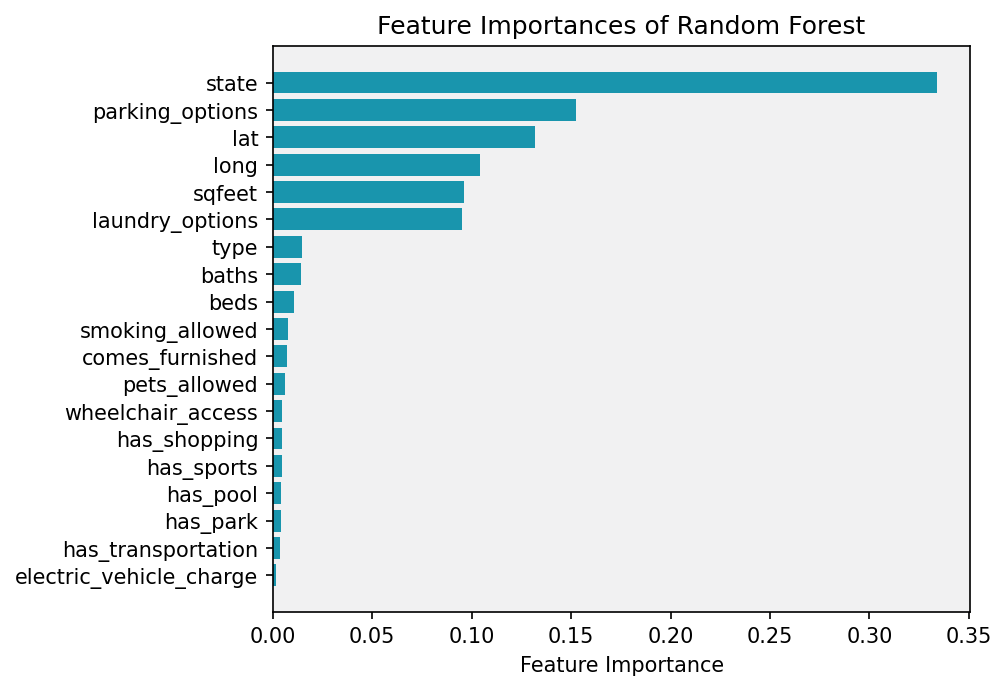

In [267]:
importances = pd.Series({i:j for i,j in zip(X.columns, rf.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of Random Forest")
plt.xlabel("Feature Importance");

## AdaBoost

In [169]:
ada = AdaBoostRegressor()

rmse, mape, r2 = pipeline(ada, X_train, y_train, X_test, y_test)

model_scores["AdaBoost"] = [rmse, mape, r2]
model_scores["AdaBoost"]

[322.34817081069843, 0.281308117074234, 0.41407515045463195]

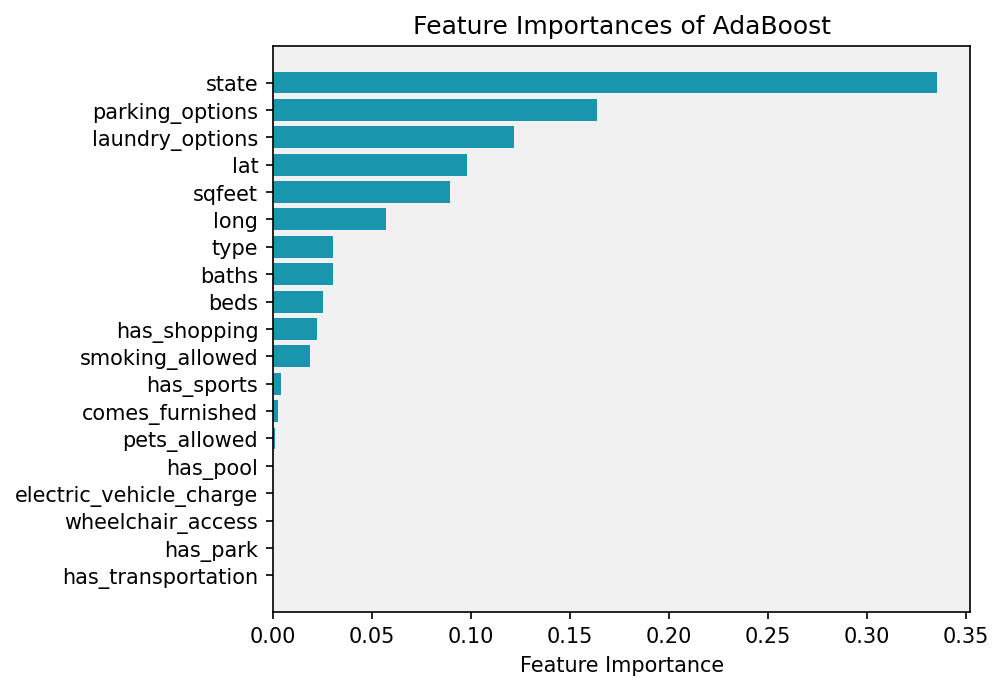

In [264]:
importances = pd.Series({i:j for i,j in zip(X.columns, ada.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of AdaBoost")
plt.xlabel("Feature Importance");

## XGBoost

In [137]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.2)

rmse, mape, r2 = pipeline(xgb, X_train, y_train, X_test, y_test)

model_scores["XGBoost"] = [rmse, mape, r2]
model_scores["XGBoost"]

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


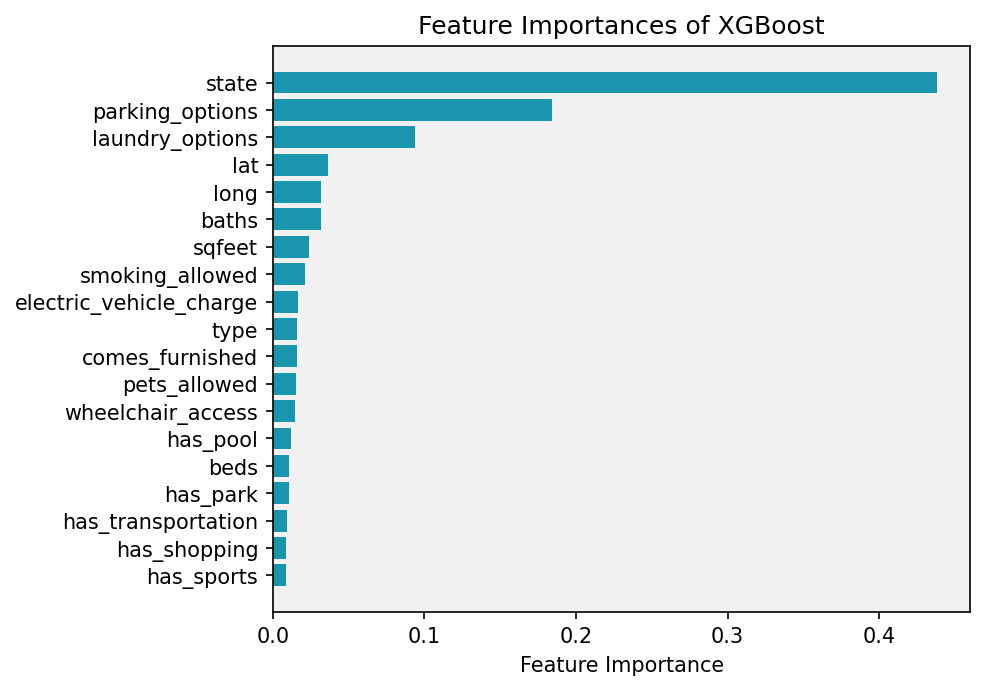

In [263]:
importances = pd.Series({i:j for i,j in zip(X.columns, xgb.feature_importances_)}).sort_values()

fig, ax = plt.subplots(figsize=(6,5), dpi=150)
ax.set_facecolor("#f1f1f2")

plt.barh(importances.index, importances.values, color="#1995ad")
plt.title("Feature Importances of XGBoost")
plt.xlabel("Feature Importance");

## Results

In [268]:
pd.DataFrame(model_scores, index=["RMSE", "MAPE", "R2"])

,LinearRegression,RandomForest,AdaBoost,XGBoost
RMSE,270.739598,128.625158,322.348171,132.840855
MAPE,0.185657,0.058434,0.281308,0.073973
R2,0.586672,0.906708,0.414075,0.900493


In [269]:
results = pd.DataFrame(model_scores, index=["RMSE", "MAPE", "R2"]).T
results

,RMSE,MAPE,R2
LinearRegression,270.739598,0.185657,0.586672
RandomForest,128.625158,0.058434,0.906708
AdaBoost,322.348171,0.281308,0.414075
XGBoost,132.840855,0.073973,0.900493


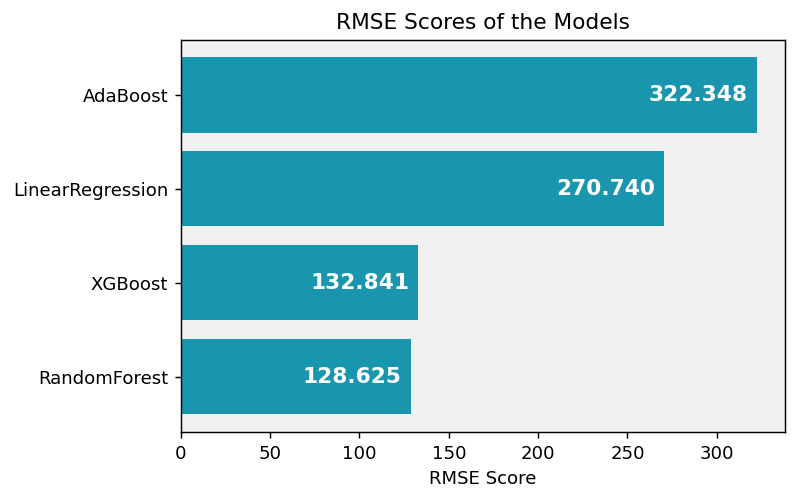

In [270]:
fig, ax = plt.subplots(figsize=(6,4), dpi=130)
ax.set_facecolor("#f1f1f2")

viz_result = results["RMSE"].sort_values()
plt.barh(viz_result.index, viz_result.values, color="#1995ad")
plt.title("RMSE Scores of the Models")
plt.xlabel("RMSE Score")

for i, value in enumerate(viz_result):
    plt.text(value-5, i, f"{value:.3f}", va="center", ha="right", weight="bold", c="white", fontsize="large")

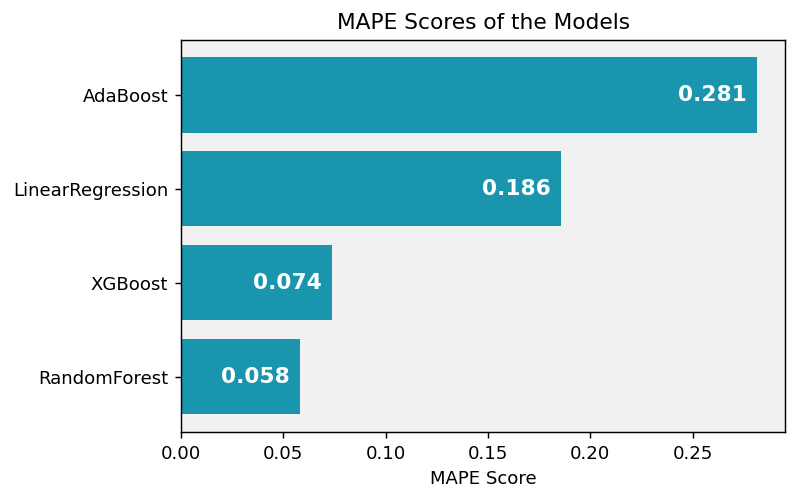

In [271]:
fig, ax = plt.subplots(figsize=(6,4), dpi=130)
ax.set_facecolor("#f1f1f2")

viz_result = results["MAPE"].sort_values()
plt.barh(viz_result.index, viz_result.values, color="#1995ad")
plt.title("MAPE Scores of the Models")
plt.xlabel("MAPE Score")

for i, value in enumerate(viz_result):
    plt.text(value-.005, i, f"{value:.3f}", va="center", ha="right", weight="bold", c="white", fontsize="large")

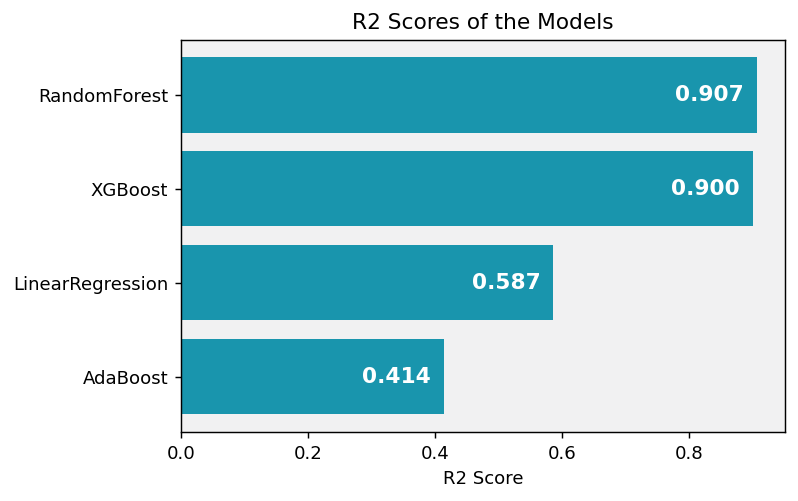

In [272]:
fig, ax = plt.subplots(figsize=(6,4), dpi=130)
ax.set_facecolor("#f1f1f2")

viz_result = results["R2"].sort_values()
plt.barh(viz_result.index, viz_result.values, color="#1995ad")
plt.title("R2 Scores of the Models")
plt.xlabel("R2 Score")

for i, value in enumerate(viz_result):
    plt.text(value-.02, i, f"{value:.3f}", va="center", ha="right", weight="bold", c="white", fontsize="large")

# Tuning the models

In [28]:
from sklearn.model_selection import GridSearchCV

In [49]:
def fine_tune(model, params, X_train, X_val, y_train, y_val, v=2):
    grid_search = GridSearchCV(model, params, cv=5, scoring="neg_mean_squared_error", verbose=v)
    
    grid_search.fit(X_train, y_train)
    preds = grid_search.predict(X_val)
    
    return grid_search.best_estimator_, grid_search.best_params_

## RandomForest

In [110]:
base_rf = RandomForestRegressor()

rf_params = {"n_estimators":[64, 100, 128],
              "max_features":[3,5,7,9],
              "random_state":[42]}

best_rf, best_rf_params = fine_tune(base_rf, rf_params, X_train, X_val, y_train, y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

## AdaBoost

In [111]:
base_ada = AdaBoostRegressor()

ada_params = {"n_estimators":[30, 40, 50, 60, 70],
              "learning_rate":[0.03, 0.1, 0.3, 1],
              "random_state":[42]}

best_ada, best_ada_params = fine_tune(base_ada, ada_params, X_train, X_val, y_train, y_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END learning_rate=0.03, n_estimators=30, random_state=42; total time=   5.8s
[CV] END learning_rate=0.03, n_estimators=30, random_state=42; total time=   5.5s
[CV] END learning_rate=0.03, n_estimators=30, random_state=42; total time=   5.6s
[CV] END learning_rate=0.03, n_estimators=30, random_state=42; total time=   5.8s
[CV] END learning_rate=0.03, n_estimators=30, random_state=42; total time=   5.6s
[CV] END learning_rate=0.03, n_estimators=40, random_state=42; total time=   7.9s
[CV] END learning_rate=0.03, n_estimators=40, random_state=42; total time=   7.4s
[CV] END learning_rate=0.03, n_estimators=40, random_state=42; total time=   7.6s
[CV] END learning_rate=0.03, n_estimators=40, random_state=42; total time=   7.4s
[CV] END learning_rate=0.03, n_estimators=40, random_state=42; total time=   7.6s
[CV] END learning_rate=0.03, n_estimators=50, random_state=42; total time=   9.4s
[CV] END learning_rate=0.03, n_estim

In [116]:
best_ada.feature_importances_

array([0.00920946, 0.        , 0.03504403, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13140076,
       0.2162776 , 0.03710588, 0.00513114, 0.56583113, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [113]:
ada_fine = AdaBoostRegressor(learning_rate=0.1, n_estimators=40, random_state=42)
ada_fine.fit(X_train, X_val)
preds = ada.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, preds))
mape_score = mean_absolute_percentage_error(y_test, preds)
r2 = r2_score(y_test, preds)

{'learning_rate': 0.1, 'n_estimators': 40, 'random_state': 42}

## XGBoost

In [41]:
base_xgb = XGBRegressor()

xgb_params = {"eta":[0.03,0.1,0.3,1],
              "gamma":[0, 0.3, 1, 3, 5],
              'max_depth': [2, 4, 6],
              'subsample': [0.6, 0.8, 1.0],
              }

best_xgb, best_xgb_params = fine_tune(base_xgb, xgb_params, X_train, X_val, y_train, y_val)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
C:\Users\erdem\anaconda3\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a futu

In [47]:
X.columns

Index(['type', 'sqfeet', 'beds', 'baths', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'lat', 'long', 'state',
       'pets_allowed', 'has_pool', 'has_sports', 'has_park', 'has_shopping',
       'has_transportation'],
      dtype='object')

In [46]:
best_xgb.feature_importances_

array([0.01770512, 0.03101422, 0.00731591, 0.03591715, 0.01956234,
       0.01313918, 0.01158324, 0.01297134, 0.09240735, 0.19453   ,
       0.03325413, 0.02914117, 0.44487345, 0.01249613, 0.0113839 ,
       0.00739945, 0.00867516, 0.00704933, 0.00958132], dtype=float32)

<BarContainer object of 19 artists>

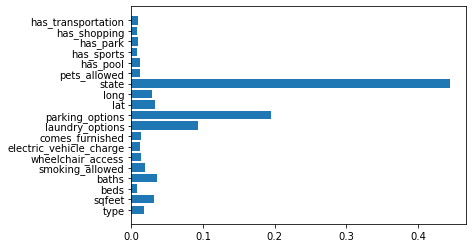

In [48]:
plt.barh(X.columns, best_xgb.feature_importances_)